# **INTRODUCTION**

Association football, more commonly known as soccer or 
just football, is a team sport that is played between two teams of 11 players using a spherical ball. It is played by approximately 250 million players in over 200 countries and dependencies, making it the world's most popular sport to date.

The men's FIFA World Ranking is a ranking system for men's national teams in association football,currently led by Brazil


# **DEFINING THE QUESTION**

Predicting result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).



# **Metric for Success**

Optimal and reliable prediction Model:





1)Optimal Accuracy   
2)With the least RMSE score achievable






# **Understanding context**

Recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

# **Recording the Experimental Design**

1)Performing EDA

2)Performing feature engineering 

3)Checking for multicollinearity

4)Building the model

5)Cross-validating the model

6)Computing RMSE

7)Creating residual plots for models, and assessing their heteroscedasticity using Bartlett’s test

8)Performing appropriate regressions on the data including your justification

9)Challenging the solution by providing insights on how to make improvements.

# **Relevance of the data**

Ranking dataset

Results dataset

https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc

# **DATA LOADING**

# **Importing our libraries**

In [ ]:
import pandas              as pd
import numpy               as np
import seaborn             as sns
import matplotlib.pyplot   as plt
import matplotlib
import scipy as sp
# A grid layout to place subplots within a figure.
import matplotlib.gridspec as gridspec


import warnings
warnings.filterwarnings('ignore')


import pandas_profiling as pp

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics



In [ ]:
def settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [ ]:
settings()

Populating the interactive namespace from numpy and matplotlib


# **Loading Data**

In [ ]:
# reading the csv file
rank = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')

In [ ]:
#previewing top and bottom rows for rank data set
rank.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [ ]:
rank.tail(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
#preiwing top and bottom rows from results dataset
results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [ ]:
results.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


# **Exploratory Data Analysis**

In [ ]:
# Checking the size of the  rank dataset
rank.shape

#from this dataset we have 57793 rows and 16 columns

(57793, 16)

In [ ]:
# Checking for more info on the ranking dataset 

rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
#column names of the rank dataset

rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
# Checking the number of unique values in the rank dataset columns 

for column in rank.columns:
  print(rank[column].nunique())
  print(column)
# print(rank[column].unique())
print('\n')

209
rank
216
country_full
216
country_abrv
11114
total_points
1557
previous_points
121
rank_change
7419
cur_year_avg
7419
cur_year_avg_weighted
7473
last_year_avg
7001
last_year_avg_weighted
7575
two_year_ago_avg
6513
two_year_ago_weighted
7628
three_year_ago_avg
5849
three_year_ago_weighted
6
confederation
286
rank_date




In [ ]:
# checking the size of the results dataset
results.shape

#from this dataset we have 40839 rows and 9 columns

(40839, 9)

In [ ]:
# Checking for more info on the results dataset 

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
# Viewing the column names of the result dataset

results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
# Checking the number of unique values in the result dataset columns 

# Checking the number of unique values in the rank dataset columns 

for column in results.columns:
  print(results[column].nunique())
  print(column)
  # print(results[column].unique())
  print('\n')

15115
date


309
home_team


306
away_team


26
home_score


22
away_score


109
tournament


1960
city


266
country


2
neutral




# **Feature Engineering**

In [ ]:
# Creating copies of our datasets
rank_copy = rank.copy()
result_copy = results.copy()

In [ ]:
# then we will a new column in the result_copy dataset
# This column will contain the perfomance of the home team
# whether win, draw or loss
# The new column is difference in goals between the home and the away teams
#we will call it goal_diff


result_copy['goal_diff'] = result_copy['home_score'] - result_copy['away_score']
result_copy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [ ]:
# Creating a function to specify whether its a win , loss or a draw based on a home team perspective
# Applying the function in a new column called home_outcome.

def home_team(home_goals):
    if home_goals > 0:
        return 'win'
    elif home_goals < 0:
        return 'loss'
    else:
        return 'draw'
      
result_copy['home_outcome'] = result_copy.goal_diff.apply(lambda i: home_team(i))


In [ ]:
# Creating a function to specify whether its a win , loss or a draw based on a Away team perspective
# Applying the function in a new column called Away_outcome.

def away_team(away_goals):
    if away_goals < 0:
        return 'win'
    elif away_goals > 0:
        return 'loss'
    else:
        return 'draw'
      
result_copy['Status_Away'] = result_copy.goal_diff.apply(lambda p: away_team(p))
result_copy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,home_outcome,Status_Away
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,loss
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,loss


In [ ]:
#checking unique values in tournament column
result_copy.tournament.unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [ ]:
#creating categories for the tournament type
def tournament(typ):
    if typ == 'Friendly':
        return 'Friendly'
    elif typ == 'FIFA World Cup':
        return 'World cup'
    else:
        return 'Other'
      
result_copy['tournament_type'] = result_copy.tournament.apply(lambda q: tournament(q))
result_copy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,home_outcome,Status_Away,tournament_type
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,loss,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,draw,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,loss,Friendly


In [ ]:
# Changing the dates column in both datasets into datetime format

result_copy['date'] = pd.to_datetime(result_copy['date'])
rank_copy['rank_date'] = pd.to_datetime(rank_copy['rank_date'])

In [ ]:
# Confirming that we have changed the date columns into datetime datatypes

print(result_copy.dtypes)
print('\n')
print(rank_copy.dtypes)

date               datetime64[ns]
home_team                  object
away_team                  object
home_score                  int64
away_score                  int64
tournament                 object
city                       object
country                    object
neutral                      bool
goal_diff                   int64
home_outcome               object
Status_Away                object
tournament_type            object
dtype: object


rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                floa

In [ ]:
# Extracting the year and month from the date column; 
# Here we will create a new column for each

rank_copy['year'] = rank_copy['rank_date'].dt.year
rank_copy['month'] = rank_copy['rank_date'].dt.month



result_copy['year'] = pd.DatetimeIndex(result_copy['date']).year
result_copy['month'] = pd.DatetimeIndex(result_copy['date']).month



In [ ]:
# changing the full country column name in ranking dataset to home_team

rank_copy = rank_copy.rename({'country_full': 'home_team'}, axis = 1)
rank_copy.head()

,rank,home_team,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [ ]:
# Dropping the columns in both datasets that we do not need before we merge
result_copy.drop(['date', 'goal_diff'], axis = 1, inplace = True)
rank_copy.drop(['country_abrv','rank_date', 'total_points', 'cur_year_avg', 'cur_year_avg_weighted' ,'last_year_avg' , 'last_year_avg_weighted' , 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg' ,'three_year_ago_weighted', 'confederation'], axis =1, inplace = True)

In [ ]:
# creating copies of the datasets
rank_copy2 = rank_copy.copy()
result_copy2 = result_copy.copy()

In [ ]:
# MERGING THE DATASETS

# Based on home_team, year, month

home_concat = pd.merge(result_copy,rank_copy, how="left", on = ['home_team', 'year', 'month'])
# renaming the rank column name to home_rank

home_concat = home_concat.rename({'rank': 'home_rank'}, axis = 1)

In [ ]:
# For the second merge: 
# We need to rename the column home_team (originally called country full) as away team so that we get their individual ranks
# 

rank_copy2 = rank_copy2.rename({'home_team': 'away_team'}, axis = 1)
rank_copy2.head(2)

,rank,away_team,previous_points,rank_change,year,month
0,1,Germany,57,0,1993,8
1,2,Italy,57,0,1993,8


In [ ]:
# Merging the home_merged dataset with the rank_copy2 based on away_team, year, month

home_concat2 = pd.merge(home_concat,rank_copy2, how="left", on = ['away_team', 'year', 'month'])
home_concat2.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_outcome,Status_Away,tournament_type,year,month,home_rank,previous_points_x,rank_change_x,rank,previous_points_y,rank_change_y
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1874,3,NaN,NaN,NaN,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,draw,Friendly,1875,3,NaN,NaN,NaN,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1876,3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# renaming the rank column as away rank in the new dataframe

home_concat2 = home_concat2.rename({'rank': 'away_rank'}, axis = 1)
home_concat2.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_outcome,Status_Away,tournament_type,year,month,home_rank,previous_points_x,rank_change_x,away_rank,previous_points_y,rank_change_y
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1874,3,NaN,NaN,NaN,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,draw,Friendly,1875,3,NaN,NaN,NaN,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1876,3,NaN,NaN,NaN,NaN,NaN,NaN


# **DATA CLEANING**

***Duplicates***

In [ ]:
# Checking for duplicates
home_concat2.duplicated().sum()

123

In [ ]:
#dropping duplicates
home_concat2.drop_duplicates(inplace = True)

In [ ]:
# Checking for duplicates again
home_concat2.duplicated().sum()

0

***unwanted features***

In [ ]:
# Dropping columns in the merged dataset that we will not need while building our model
home_concat2.drop(['country', 'city', 'home_team', 'away_team', 'tournament','previous_points_x',
       'rank_change_x', 'previous_points_y', 'rank_change_y'], axis = 1, inplace = True)

In [ ]:
home_concat2.head()

,home_score,away_score,neutral,home_outcome,Status_Away,tournament_type,year,month,home_rank,away_rank
0,0,0,False,draw,draw,Friendly,1872,11,NaN,NaN
1,4,2,False,win,loss,Friendly,1873,3,NaN,NaN
2,2,1,False,win,loss,Friendly,1874,3,NaN,NaN
3,2,2,False,draw,draw,Friendly,1875,3,NaN,NaN
4,3,0,False,win,loss,Friendly,1876,3,NaN,NaN


***Missing values***

In [ ]:
home_concat2.isnull().sum()

home_score             0
away_score             0
neutral                0
home_outcome           0
Status_Away            0
tournament_type        0
year                   0
month                  0
home_rank          22245
away_rank          22334
dtype: int64

In [ ]:
 
# some reasons why may include:
#ranking began in 1993 and our dataset goes earlier than this also we do not have the 2019 rankings 
#Therefore we will drop the data whose ranking are unavailable 
  
home_concat2.dropna(inplace = True)

In [ ]:
# confirming that there are no null values

home_concat2.isnull().sum()

home_score         0
away_score         0
neutral            0
home_outcome       0
Status_Away        0
tournament_type    0
year               0
month              0
home_rank          0
away_rank          0
dtype: int64

***Unique values***

In [ ]:
#checking for unique values in our dataset
home_concat2.nunique()

home_score          21
away_score          14
neutral              2
home_outcome         3
Status_Away          3
tournament_type      3
year                26
month               12
home_rank          209
away_rank          209
dtype: int64

In [ ]:
#  checking the shape of the cleaned data

home_concat2.shape

(16895, 10)

In [ ]:
# Encoding the categorical columns 
#

pi = LabelEncoder()
home_concat_encoded = home_concat2.apply(pi.fit_transform)

home_concat_encoded.head()

,home_score,away_score,neutral,home_outcome,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,2,1,0,7,69,4
17912,0,0,0,0,0,1,0,7,21,34
17913,1,5,0,1,2,1,0,7,93,7
17914,0,0,1,0,0,1,0,7,57,24


***Outliers***

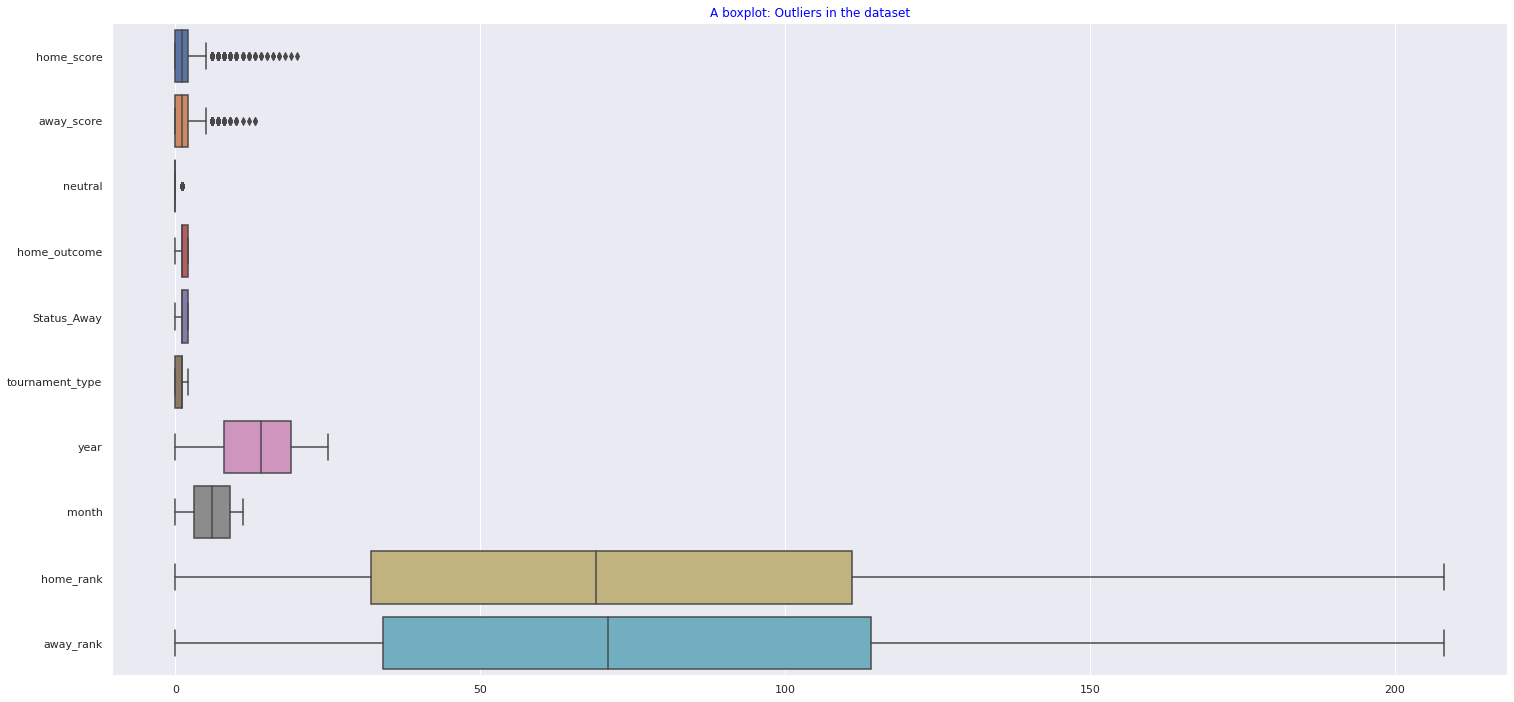

In [ ]:
plt.figure()
ax = sns.boxplot(data = home_concat_encoded , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.show()

The home and away score columns have  outliers,but we will not remove them in this stage, to find out if they have an effect in our model.

# **DATA ANALYSIS**

Text(0.5, 1.0, 'Distribution of Home Team Scores/Goals')

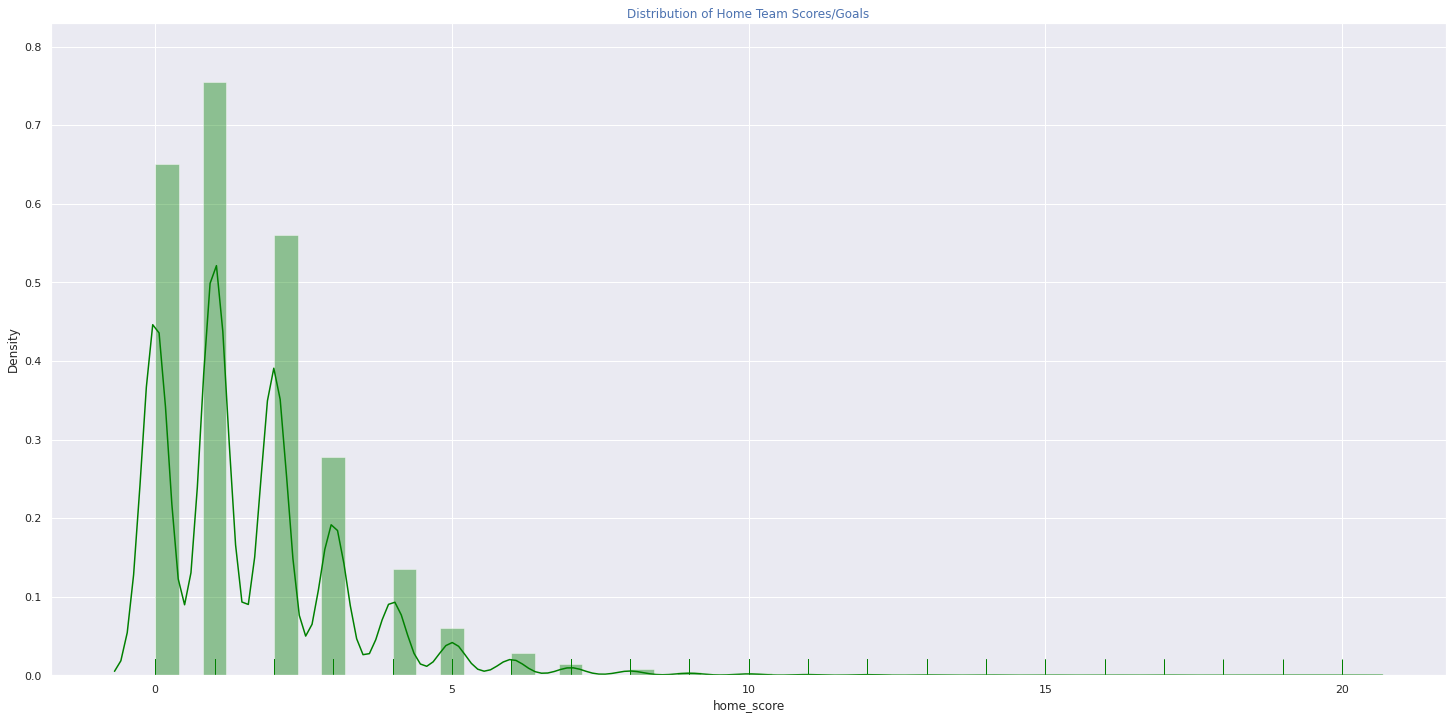

In [ ]:
#distribution of the goals for home teams
plt.figure()
plt.subplot()
sns.distplot(home_concat_encoded["home_score"],color="green",rug=True)

plt.title("Distribution of Home Team Scores/Goals",color='b')

Text(0.5, 1.0, 'Distribution of away Team Scores/Goals')

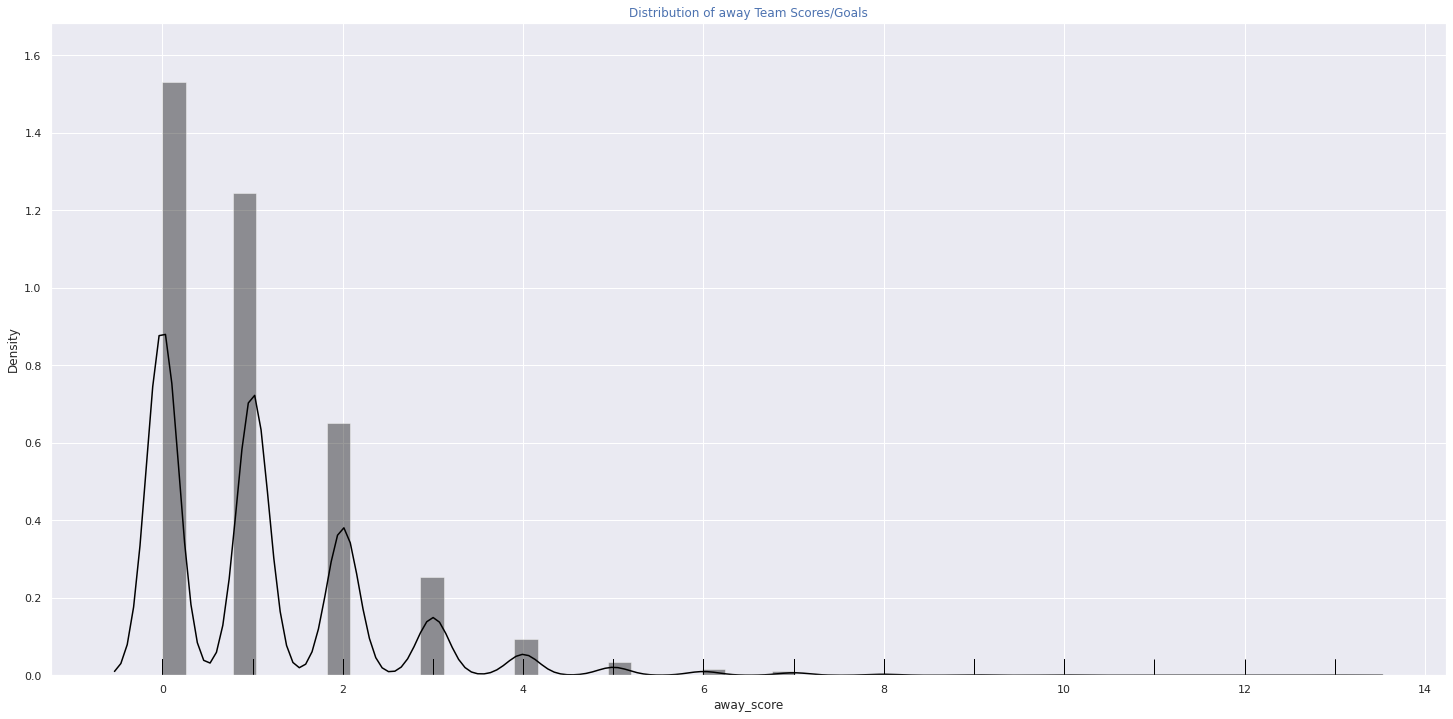

In [ ]:
#distribution of the goals for away teams
plt.figure()
plt.subplot()
sns.distplot(home_concat_encoded["away_score"],color="black",rug=True)

plt.title("Distribution of away Team Scores/Goals",color='b')

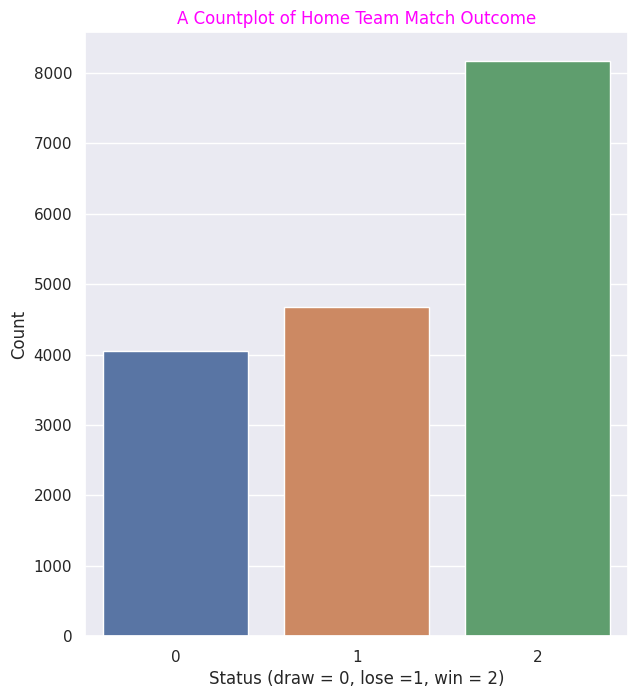

In [ ]:
plt.figure(figsize = (7,8), dpi = 100)
sns.countplot(home_concat_encoded['home_outcome'])
plt.xlabel('Status (draw = 0, lose =1, win = 2)')
plt.ylabel('Count')
plt.title('A Countplot of Home Team Match Outcome', color = 'magenta')
plt.show()

# **MULTICOLINEARITY**

In [ ]:
#  checking if independent variables are  correlated to each other

# Getting the pearson correation coefficient for each of the variables

correlation = home_concat_encoded.corr()
correlation

,home_score,away_score,neutral,home_outcome,Status_Away,tournament_type,year,month,home_rank,away_rank
home_score,1.000000,-0.164630,-0.042069,0.522603,-0.109024,0.050670,-0.038744,0.019612,-0.135755,0.320343
away_score,-0.164630,1.000000,0.100251,-0.241832,0.468678,0.034421,-0.008379,0.018170,0.221477,-0.180634
neutral,-0.042069,0.100251,1.000000,-0.045219,0.047965,0.126197,0.042915,-0.105011,0.037090,0.047561
home_outcome,0.522603,-0.241832,-0.045219,1.000000,0.394717,0.045661,-0.018907,0.011666,-0.115259,0.214090
Status_Away,-0.109024,0.468678,0.047965,0.394717,1.000000,0.061724,0.004347,0.002941,0.133551,-0.088224
tournament_type,0.050670,0.034421,0.126197,0.045661,0.061724,1.000000,-0.020240,0.122963,0.069106,0.069350
year,-0.038744,-0.008379,0.042915,-0.018907,0.004347,-0.020240,1.000000,-0.002137,0.104167,0.105806
month,0.019612,0.018170,-0.105011,0.011666,0.002941,0.122963,-0.002137,1.000000,0.029475,0.030676
home_rank,-0.135755,0.221477,0.037090,-0.115259,0.133551,0.069106,0.104167,0.029475,1.000000,0.469742
away_rank,0.320343,-0.180634,0.047561,0.214090,-0.088224,0.069350,0.105806,0.030676,0.469742,1.000000


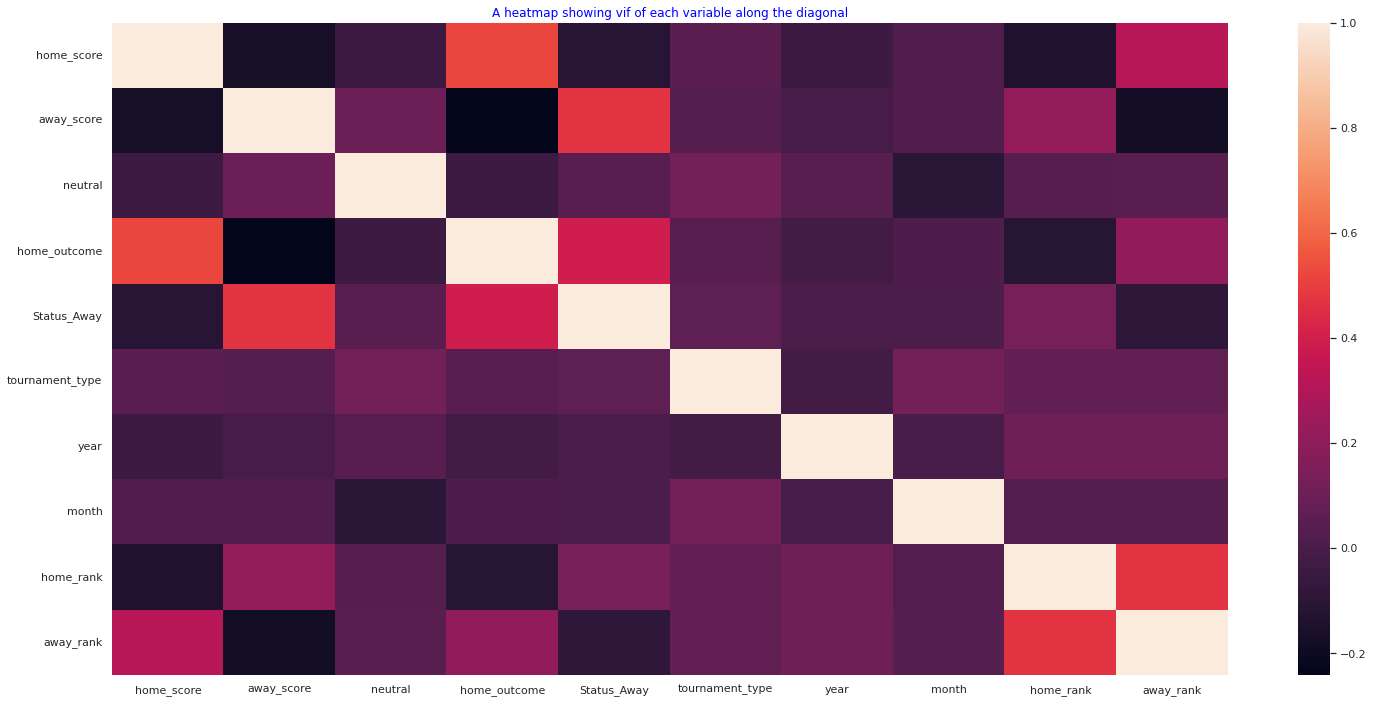

In [ ]:
# Checking for independence between features
import seaborn as sb
sb.heatmap(home_concat_encoded.corr())  
plt.title('A heatmap showing vif of each variable along the diagonal', color = 'blue' )
plt.show()

# **BUILDING A MODEL**

# **Polynomial Regression Model**

In [ ]:
# Approach 1: Polynomial approach

# What to train given:

# Rank of home team
# Rank of away team
# Tournament type

# Model 1: Predict how many goals the home team scores

# Model 2: Predict how many goals the away team scores

In [ ]:
# Viewing our dataset before splitting 

home_concat_encoded.head()

,home_score,away_score,neutral,home_outcome,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,2,1,0,7,69,4
17912,0,0,0,0,0,1,0,7,21,34
17913,1,5,0,1,2,1,0,7,93,7
17914,0,0,1,0,0,1,0,7,57,24


In [ ]:
# Model 1
# Predict how many goals the home team scores given home rank
# Splitting the dataset into the features and target variable


X = home_concat_encoded['home_rank'].values.reshape(-1, 1)

y = home_concat_encoded['home_score'].values.reshape(-1, 1)

In [ ]:
# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
# Fit Linear Regression model to the dataset


reg_line = LinearRegression()
reg_line.fit(X, y)

LinearRegression()

In [ ]:
# Fitting the polynomial features to the X the independent variable

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [ ]:
# Fitting a polynomial Regression to the dataset

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
# Making predictions using our model

y_pred_poly = pol_reg.predict(X_poly)

In [ ]:
# Evaluation our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_poly)))
print('r2_score: ' , r2_score(y, y_pred_poly))

RMSE:  1.5880578998328967
r2_score:  0.018694481014556508


In [ ]:
# Mean of the actual scores

np.mean(y)

1.6026635099141757

Comparing the RMSE = 1.5 with 10% of the actual mean = 0.16,
the RMSE is very high,therefore this is not a good model to use for predicting the home scores.

In [ ]:
# Model 2: Predict how many goals the away team scores given the away team
#
X = home_concat_encoded['away_rank'].values.reshape(-1, 1)

y = home_concat_encoded['away_score'].values.reshape(-1, 1)


In [ ]:
## Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
# Fitting the polynomial features to the X

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

In [ ]:
# Fitting a polynomial Regression to the dataset

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
# Making predictions using our model

y_pred_poly = pol_reg.predict(X_poly)

In [ ]:
# Evaluating our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_poly)))
print('r2_score: ' , r2_score(y, y_pred_poly))

RMSE:  1.2165654223317743
r2_score:  0.04008131109627655


In [ ]:
# Calculating the Mean of the actual scores 
# We will compare 10% of this mean with the RMSE

np.mean(y)

1.0687185557857355

Comparing the RMSE = 1.2 with 10% of the actual mean = 0.1,the RMSE is very high,therefore this is not a good model to use for predicting the away scores

***Logistic Regression Model***

In [ ]:
# Splitting our dataset
# X: independent variables
# y: dependent variable

# Splitting the data into train and test sets

X = home_concat_encoded.drop(['Status_Away', 'home_outcome', 'home_score', 'away_score'], axis = 1)
y = home_concat_encoded.home_outcome


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [ ]:
# Fitting our model to our train sets
# Logistic Regression model in this case
# 

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

In [ ]:
# Getting the accuracy score of our model

print(accuracy_score(y_test, y_pred))

0.5839005622965374


The model has a 58% prediction accuracy

# **CROSS-VALIDATION**

In [ ]:
# Splitting our dataset
# independet variables as X
# dependent variable as y

X = home_concat_encoded.drop(['Status_Away', 'home_outcome', 'home_score', 'away_score'], axis = 1).values
y = home_concat_encoded.home_outcome.values

# specifying the number of folds

folds = KFold(n_splits = 10)


# We now create and assess 10 models based on the folds we created.

RMSES = [] # An array of RMSEs to keep track of the RSME of each model
count = 1   # starting point # helps to keep track of the model number in training

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # Setting up the train and test based on the split determined by KFold
  # With 10 folds we split our data into training and test sets
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fitting a Logistic regression model
  LogReg = LogisticRegression()  
  LogReg.fit(X_train, y_train)
  
  # Assess the accuracy of the model
  y_pred = LogReg.predict(X_test)
  
  # Calculating the RMSES of each model
  # Appending each RMSE into the list earlier created
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  
  # printing each model RMSE
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1
  
 


Training model 1
Model 1 Root Mean Squared Error: 0.890448992522325

Training model 2
Model 2 Root Mean Squared Error: 0.9348606832258056

Training model 3
Model 3 Root Mean Squared Error: 0.9370733743286807

Training model 4
Model 4 Root Mean Squared Error: 0.9601528477926108

Training model 5
Model 5 Root Mean Squared Error: 0.9275532489220222

Training model 6
Model 6 Root Mean Squared Error: 0.9275086794759693

Training model 7
Model 7 Root Mean Squared Error: 0.9865885748303547

Training model 8
Model 8 Root Mean Squared Error: 0.9542525802818357

Training model 9
Model 9 Root Mean Squared Error: 0.9717745452139983

Training model 10
Model 10 Root Mean Squared Error: 0.9964412698513031


In [ ]:
# Printing the mean and the standard deviation of the RMSES in all the 10 models

print(np.mean(RMSES))
print(np.std(RMSES))
 

0.9486654796444907
0.030042198109440102


Since the standard deviation is low, the models are stable. This is also visible in the plot below

# **Heteroskedasticity**

In [ ]:
# First: splitting our dataset 
# Into the feature set and the target variable

X = home_concat_encoded.drop(['Status_Away', 'home_outcome', 'home_score', 'away_score'], axis = 1)
y = home_concat_encoded.home_outcome

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fitting a Logistic model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

# We now create the residual by subtracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Creating a summary description of the residuals:

pd.DataFrame(residuals).describe()

residuals.mean()

0.41580349215744306

The mean is 0.43 indicating that we tend to be fairly correct, although slightly over estimating the home team perfomance by, on average, 43.8%

# **Residual Plots**

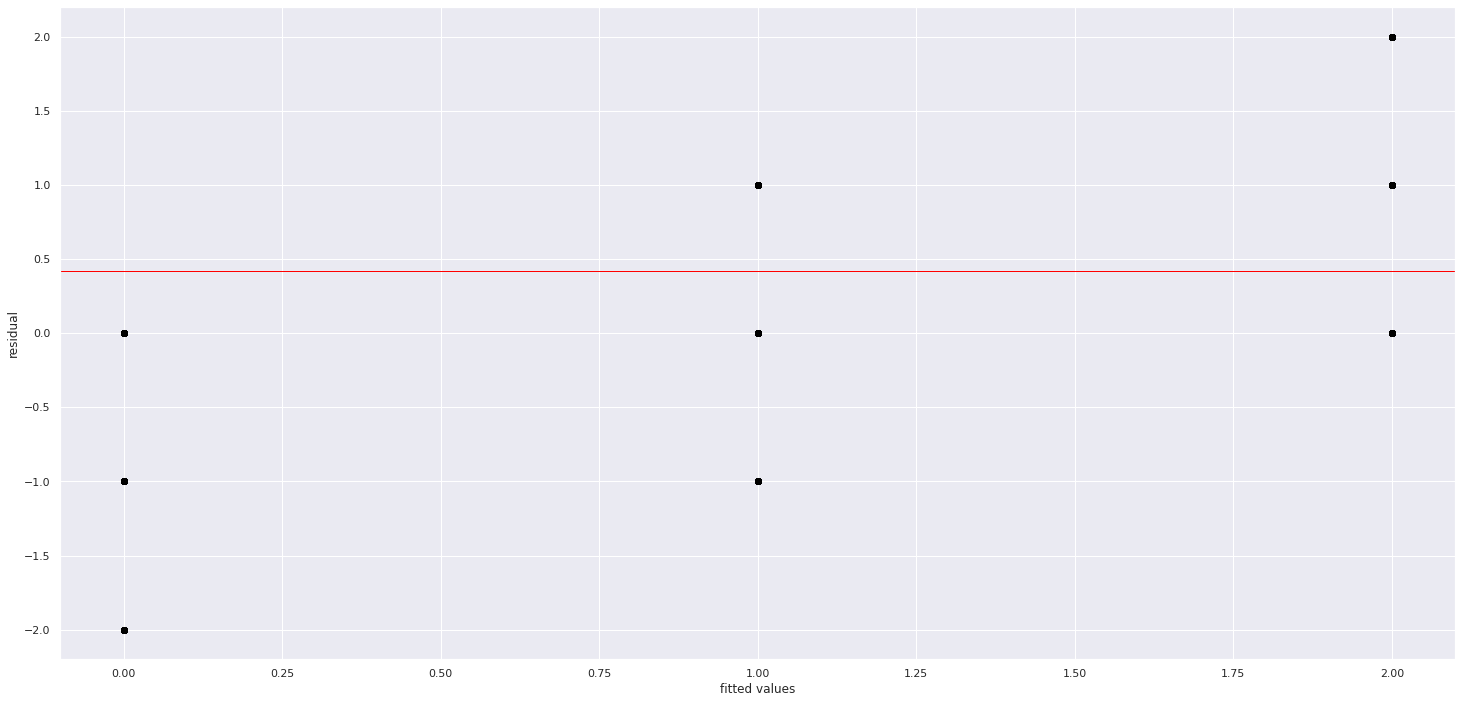

In [ ]:

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

# **Barlett's test**

In [ ]:
# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The variances are Homogeneous!')

6.680655938722896e-211
The variances are Homogeneous!


# **Challenging the solution**

In [ ]:
# Using Hyperparameter Tuning

# Splitting the dataset into independent variables and target variable

X = home_concat_encoded.drop(['Status_Away', 'home_outcome', 'home_score', 'away_score'], axis = 1)
y = home_concat_encoded.home_outcome


In [ ]:
# Creating the logistic Regression

logistic = LogisticRegression()


In [ ]:
# Creating regularization penalty space    
#  penalty term is a constraint region or a budget 
# Regulization helps to select the preferred model complexity 
# so that the model is better at predicting

# L1: uses absolute values in the penalty function
# L2: minimizes the sum of errors

penalty = ['l1', 'l2']

# Creating regularization hyperparameter space

C = np.logspace(0, 4, 10)

# Creating hyperparameters options

hyperparameters = dict(C=C, penalty = penalty)

In [ ]:
# Creating grid search using 10-fold cross validation

clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)

In [ ]:
# Fitting grid search
best_model = clf.fit(X, y)

In [ ]:
# Viewing best hyperparameters

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
best_model.best_score_

Best Penalty: l2
Best C: 1291.5496650148827


0.5783351375590752

In [ ]:
# Predicting target vector

best_model.predict(X)

array([2, 1, 2, ..., 1, 1, 1])

In [ ]:
# Using XGBOOST 

# Tunning the parameters

import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X, y)

predictions = gbm.predict(X_test)

print(accuracy_score(y_test, predictions))

0.5945546019532406


# **Conclusion**

1)The best accuracy score using two hyperparameters is 58%

2)Using XGboost algorithm the accuracy score was 59%

3)Therefore, another algorithm can be considered to improve the accuracy score or more hyperparameters should be tuned